Evaluasi model adalah tahap krusial dalam siklus machine learning untuk mengukur seberapa baik kinerja model pada data yang belum pernah dilihat sebelumnya.

**Apa Itu Evaluasi Model?**

Bayangkan Anda adalah seorang guru yang sedang mengajar murid (model) menggunakan buku pelajaran (data latih).

- Pelatihan: Murid belajar dan menghafal semua soal dan jawaban di buku pelajaran.

- Evaluasi: Anda memberikan ujian akhir dengan soal-soal baru yang tidak ada di buku pelajaran (data uji).

Evaluasi model adalah proses "ujian akhir" ini. Tujuannya bukan untuk melihat seberapa baik model menghafal data latih, melainkan untuk mengukur kemampuannya dalam melakukan generalisasi—menerapkan pengetahuannya pada situasi baru.

Jika murid hanya menghafal, ia akan mendapat nilai 100 untuk soal dari buku, tapi akan gagal total di ujian akhir. Dalam machine learning, ini disebut overfitting. Evaluasi membantu kita mendeteksi masalah ini.

---

**Kenapa Evaluasi Model Sangat Penting?**
1. Menghindari Keputusan yang Salah dan Merugikan:
Model yang tidak dievaluasi dengan baik bisa menjadi bencana di dunia nyata.

    - Kesehatan: Model diagnosis penyakit yang buruk bisa salah menyatakan pasien sakit sebagai sehat (fatal) atau sebaliknya (menyebabkan stres dan biaya tes yang tidak perlu).

    - Keuangan: Model skor kredit yang buruk bisa menolak pinjaman untuk orang yang layak atau malah menyetujuinya untuk orang yang berisiko tinggi, menyebabkan kerugian finansial.

    - Bisnis: Model prediksi churn pelanggan yang salah bisa membuat perusahaan membuang uang untuk promosi yang salah sasaran.

2. Memilih Model Terbaik:

    Saat membuat solusi machine learning, kita sering kali mencoba beberapa model (misalnya, Regresi Logistik, Decision Tree, atau Neural Network). Evaluasi memberikan metrik objektif (seperti akurasi, presisi, atau F1-score) untuk membandingkan model-model tersebut secara adil. Tanpa evaluasi, memilih model terbaik hanya seperti menebak-nebak.

3. Membangun Kepercayaan

    Tidak ada yang akan menggunakan atau mempercayai sebuah model jika kinerjanya tidak terbukti. Dengan menyajikan hasil evaluasi yang solid ("Model ini memiliki akurasi 95% dalam mendeteksi penipuan pada data uji"), kita dapat meyakinkan pemangku kepentingan (manajer, klien, atau pengguna) bahwa model tersebut dapat diandalkan.

Singkatnya, tanpa evaluasi, membangun model machine learning sama seperti membangun jembatan tanpa pernah menguji kekuatannya—sangat berisiko dan tidak bertanggung jawab.

#**Import Library**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

#**Data Loading**

In [16]:
import pandas as pd
file_id = '1lToPycPAogRwyrSb5dQ-YdvDARd2WhCT'
download_url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(download_url)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0


In [18]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**EDA**

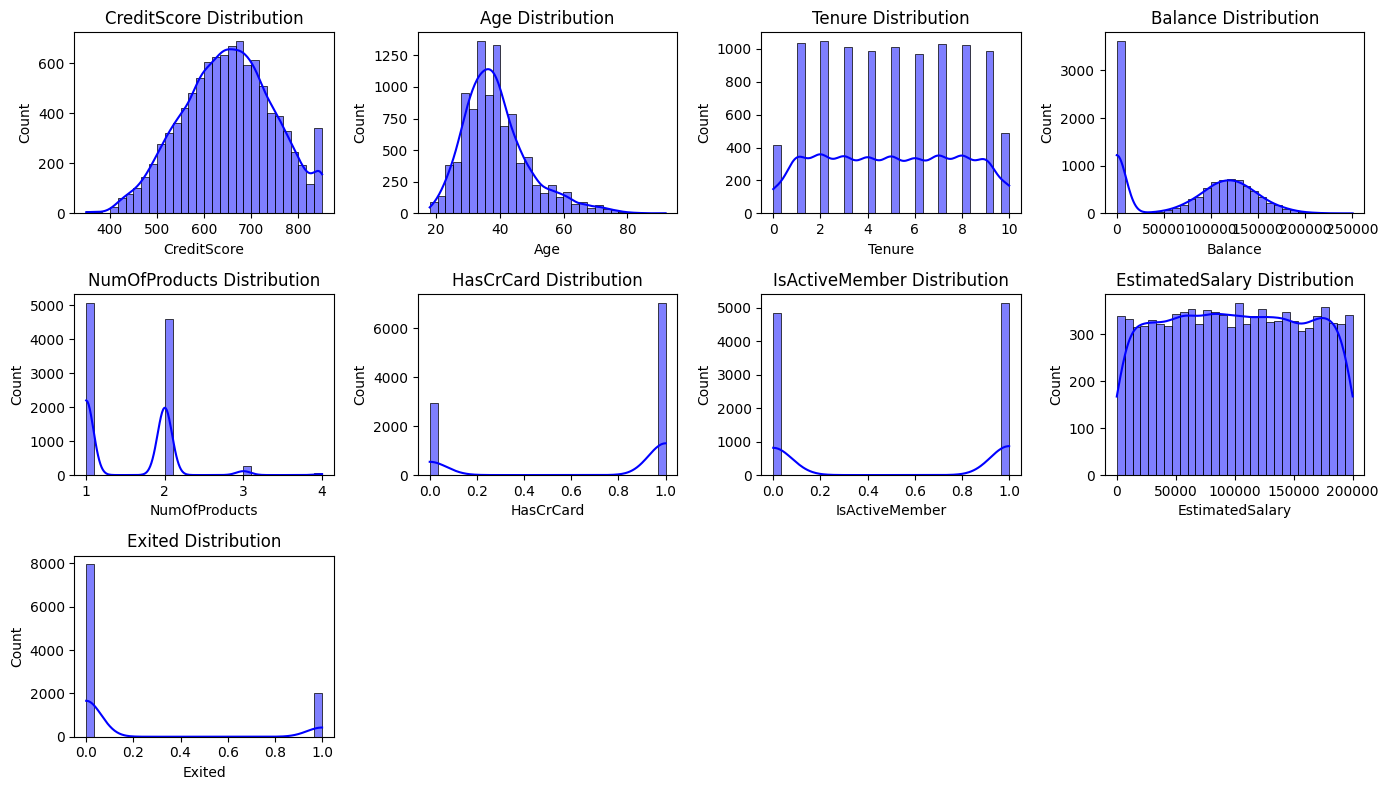

In [7]:
#plotting the distribution (histogram + KDE) of all numerical features in the datasets
num_features = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1647380647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
/tmp/ipython-input-1647380647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')


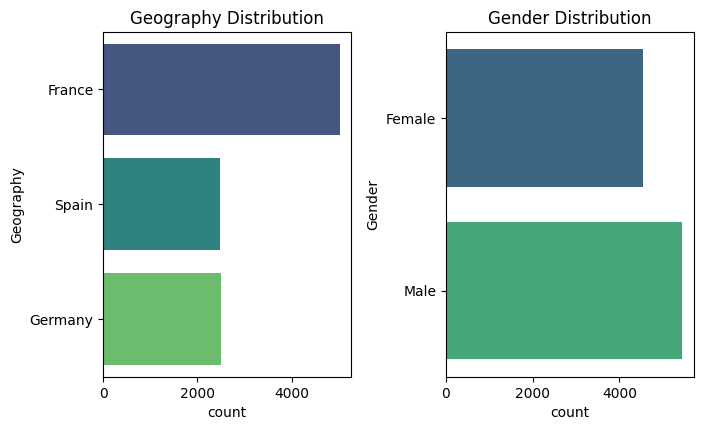

In [ ]:
#plotting the distribution (count plot) of all the categorical features in the datasets
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], palette='viridis')
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

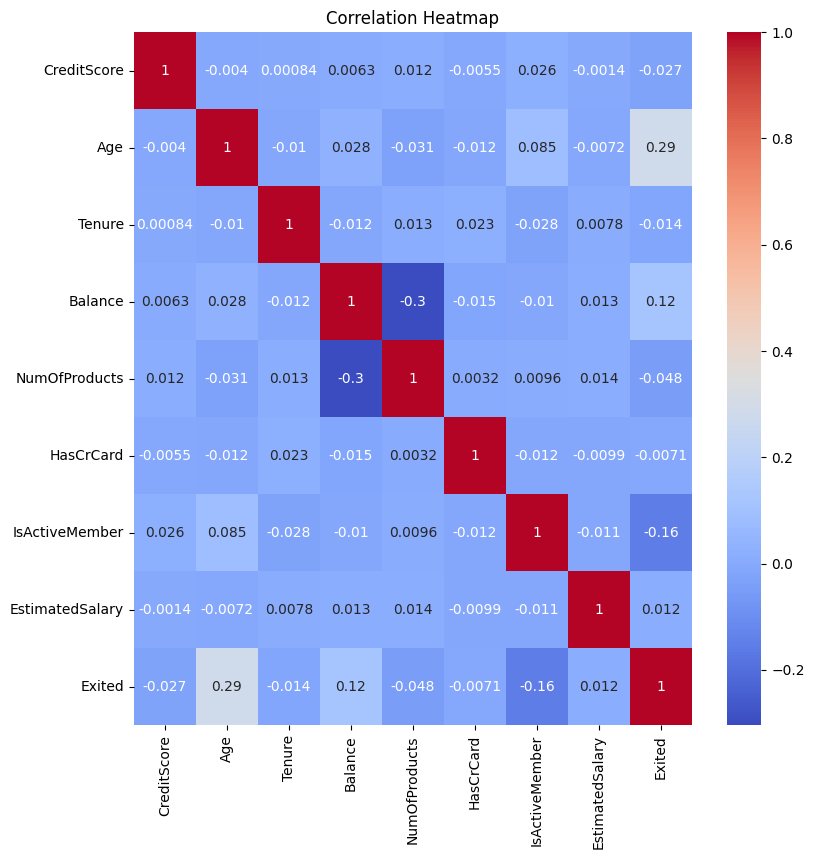

In [ ]:
#plotting a correlation heatmap for all the numerical features in the datasets
plt.figure(figsize=(9, 9))
sns.heatmap(data[num_features.columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

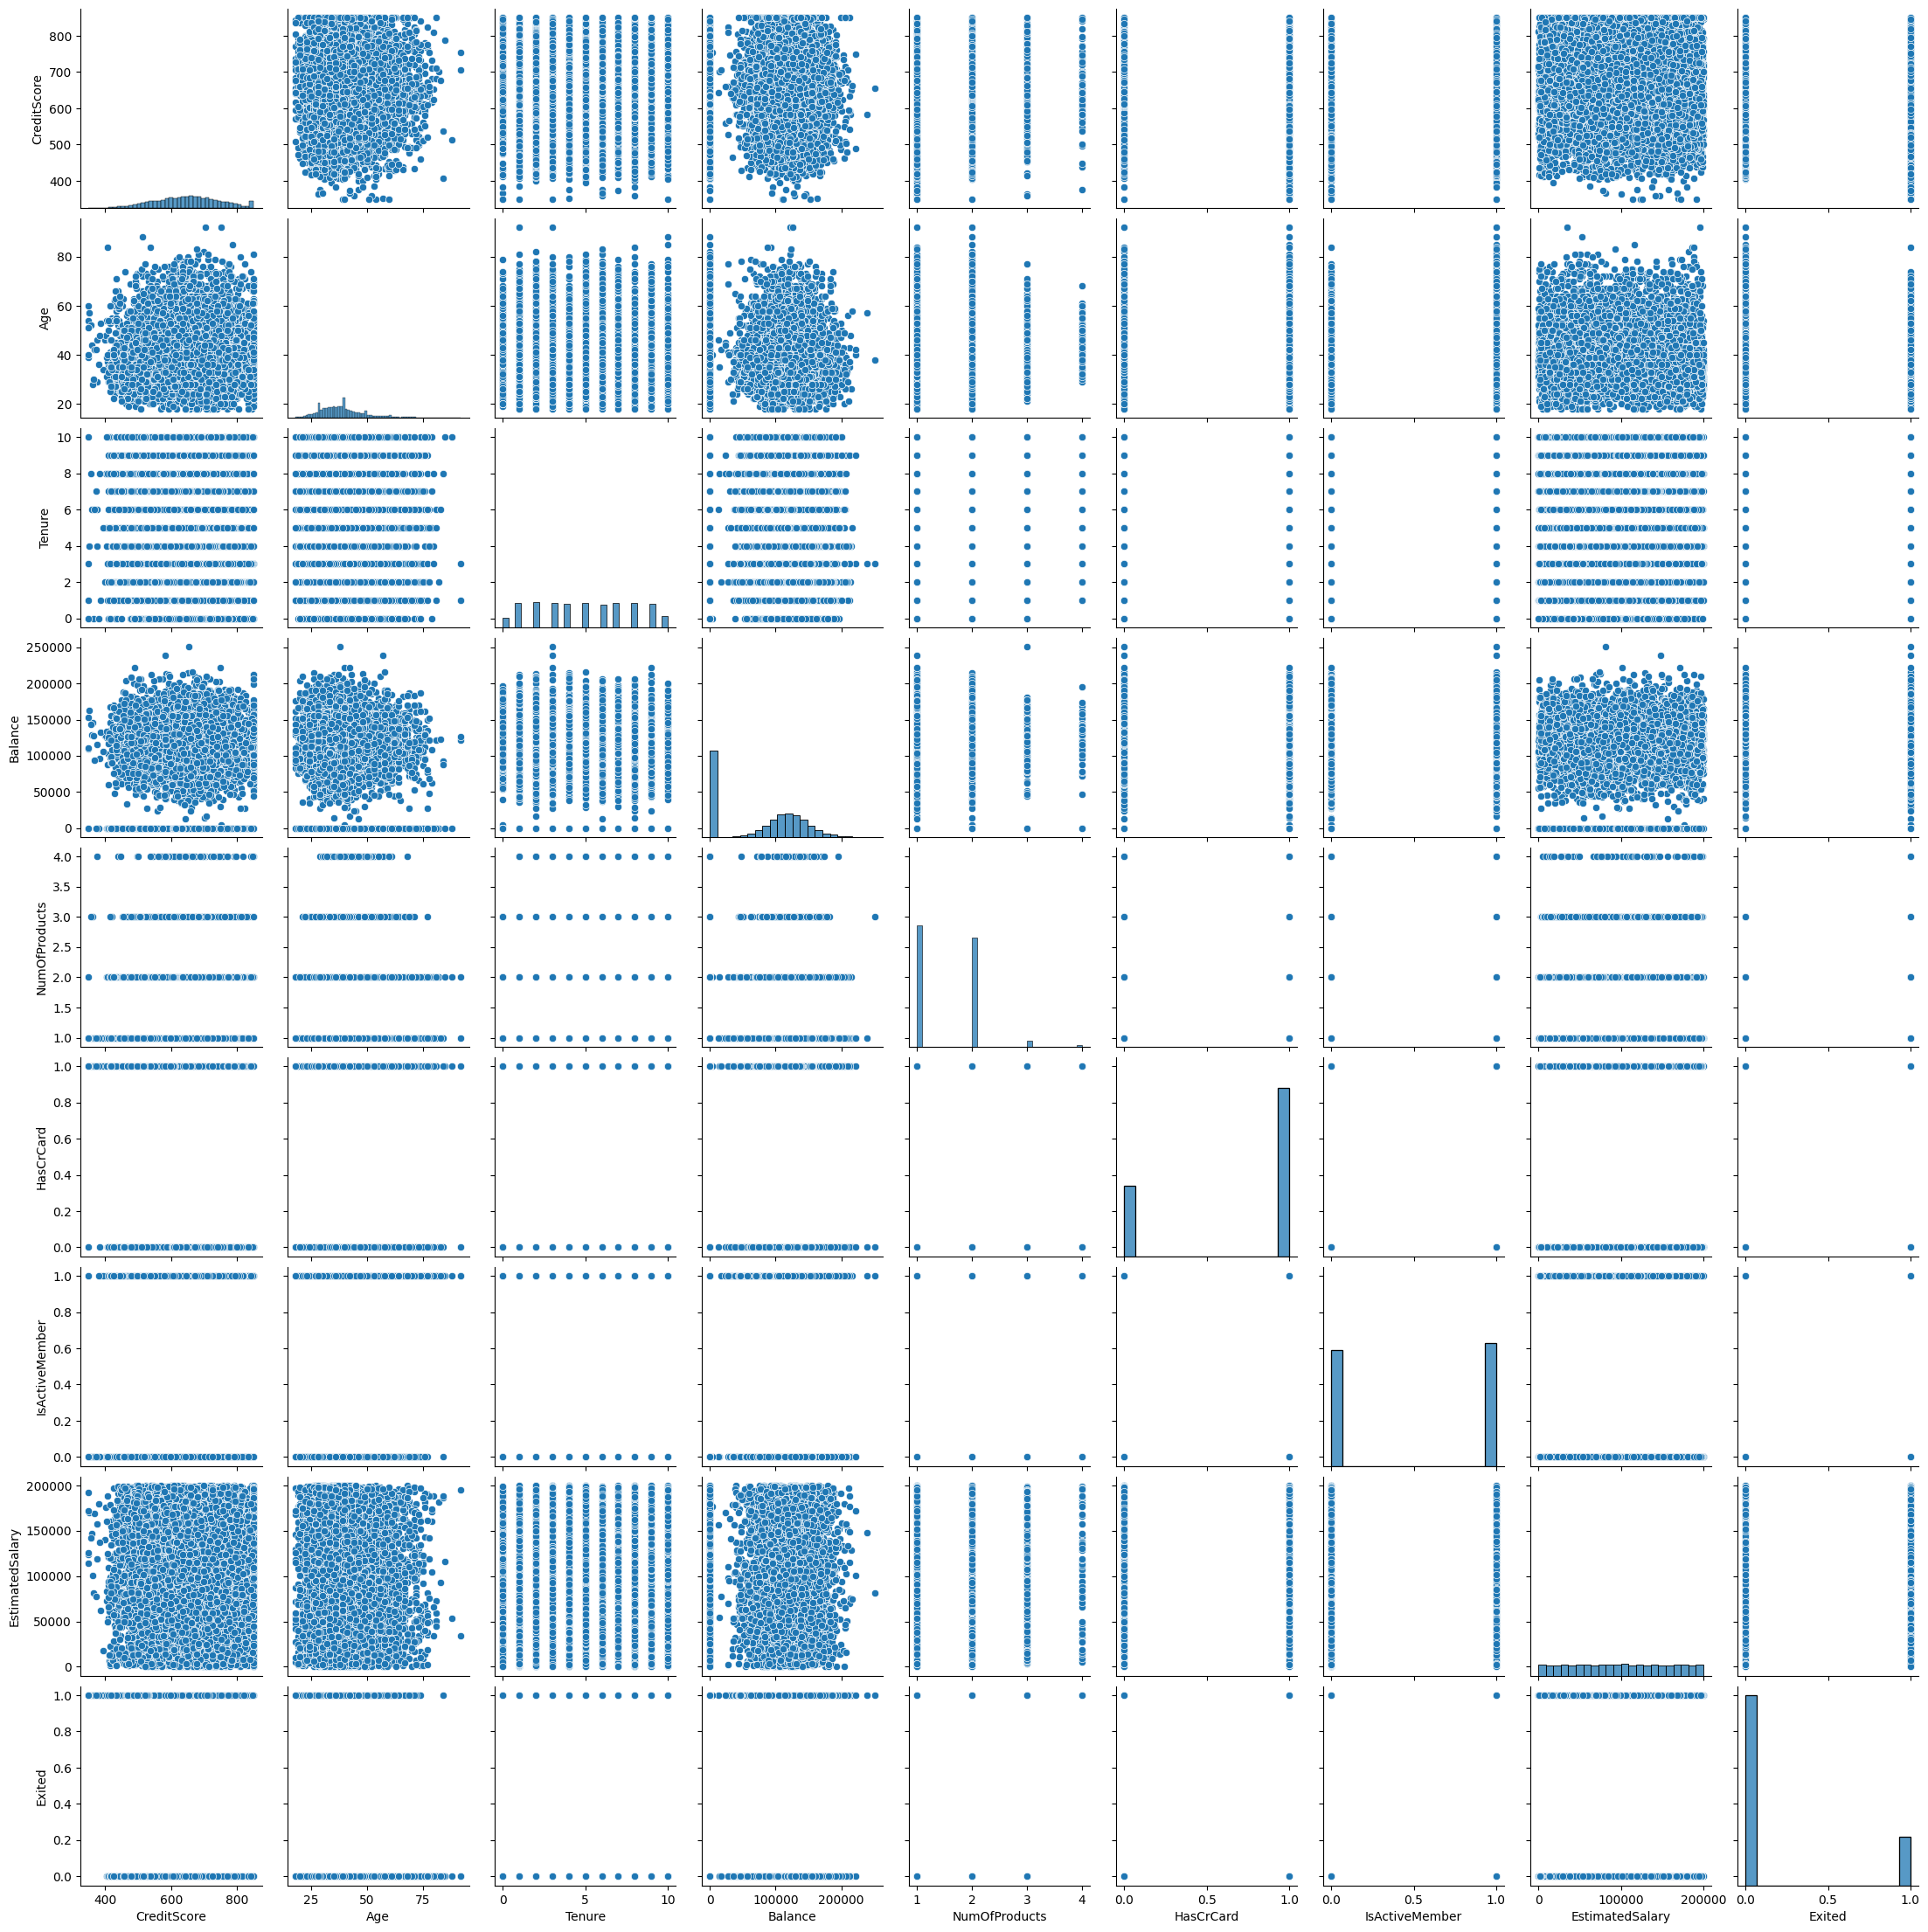

In [ ]:
# plot pairwise relationships between all numerical features using pairplot
sns.pairplot(data[num_features.columns])
plt.show()

/tmp/ipython-input-733103501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='viridis')


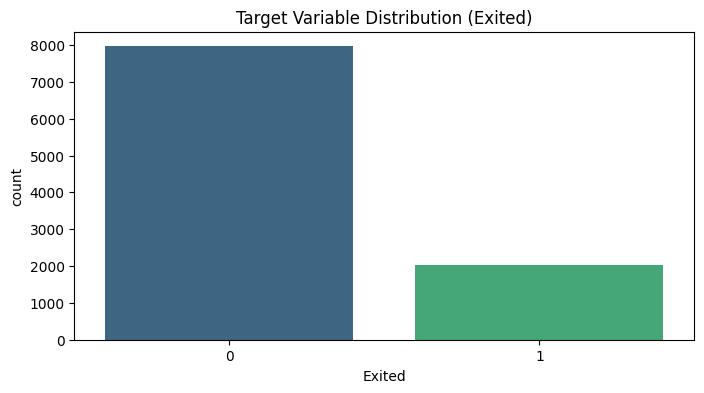

In [19]:
# visualize the distribution of the target variable 'Exited' using a count plot
plt.figure(figsize=(8, 4))
sns.countplot(x='Exited', data=data, palette='viridis')
plt.title('Target Variable Distribution (Exited)')
plt.show()

#**Label Encoder**

In [6]:
label_encoder = LabelEncoder()
categorical_columns = ['Geography', 'Gender']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,2,0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0,0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0,0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,2,0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


#**Data Splitting**

In [7]:
scaler = MinMaxScaler()

#normalize all numerical columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

#separate features (x) and target variable (y)
X = data.drop(columns=['Exited'])
y = data['Exited']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print the shape of training and test sets to verify the result
print(f"Training set shape: X_train= {X_train.shape}, y_train= {y_train.shape}")
print(f"Test set shape: X_test= {X_test.shape}, y_test= {y_test.shape}")

Training set shape: X_train= (8000, 10), y_train= (8000,)
Test set shape: X_test= (2000, 10), y_test= (2000,)


#**Model Deployment**

In [8]:
# Model Training
# Train each classifier separately
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
lr = LogisticRegression().fit(X_train, y_train)

print("Model training done")

Model training done


#**Model Evaluation**



1. **Confusion Matrix**
Confusion matrix adalah sebuah tabel yang digunakan untuk mengevaluasi performa dari sebuah model klasifikasi pada serangkaian data uji yang nilai sebenarnya sudah diketahui. Sesuai namanya, tabel ini menunjukkan seberapa "bingung" model kita dalam membedakan antar kelas. Ini memberikan gambaran yang lebih detail daripada sekadar akurasi, karena kita bisa melihat di mana letak kesalahan model.

**Komponen Utama Confusion Matrix**
Untuk memahami confusion matrix, kita perlu mengerti empat istilah utamanya, terutama dalam konteks klasifikasi biner (dua kelas, misalnya "Ya" dan "Tidak", "Spam" dan "Bukan Spam"). Mari kita gunakan contoh model prediksi penyakit jantung.

- True Positive (TP):
Model memprediksi positif, dan hasil sebenarnya memang positif.

- True Negative (TN):
Model memprediksi negatif, dan hasil sebenarnya memang negatif.

- False Positive (FP) - Kesalahan Tipe I:
Model memprediksi positif, tetapi hasil sebenarnya adalah negatif.

- False Negative (FN) - Kesalahan Tipe II:
Model memprediksi negatif, tetapi hasil sebenarnya adalah positif.

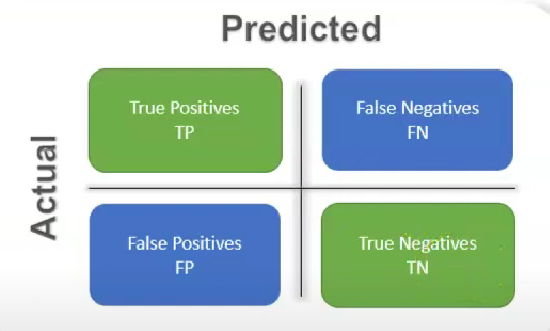

2. **Evaluation Matrix dari Confusion Matrix**
Dari keempat komponen di atas, kita bisa menurunkan berbagai metrik untuk mengukur performa model secara lebih spesifik:

    - **Akurasi (Accuracy):**

        - Pertanyaan yang dijawab: Secara keseluruhan, berapa persen prediksi yang benar?

        - Rumus *accuracy =*
        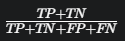

        - Kapan digunakan? Berguna ketika jumlah data di setiap kelas seimbang. Namun, bisa menyesatkan jika datanya tidak seimbang. Misalnya, jika 95% email adalah bukan spam, model yang selalu menebak "bukan spam" akan memiliki akurasi 95%, padahal tidak bisa mendeteksi spam sama sekali.
        - ⚠️ Perhatian: Akurasi bisa sangat menyesatkan pada dataset yang tidak seimbang (imbalanced dataset). Bayangkan model deteksi penipuan di mana hanya 1% transaksi adalah penipuan. Model yang selalu menebak "bukan penipuan" akan memiliki akurasi 99%, padahal model tersebut sama sekali tidak berguna!
        



    - **Presisi (Precision):**

        - Pertanyaan yang dijawab: Dari semua yang diprediksi sebagai positif, berapa persen yang benar-benar positif?

        - Rumus *precision =* 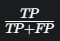

        - Kapan penting? Ketika jumlah dari False Positive tinggi. Contohnya, dalam klasifikasi email spam, Anda tidak ingin email penting (negatif) salah masuk ke folder spam (diprediksi positif). Presisi tinggi berarti ketika model mengatakan itu spam, kemungkinan besar itu benar-benar spam.

    - **Recall (Sensitivity atau True Positive Rate):**

        - Pertanyaan yang dijawab: Dari semua yang sebenarnya positif, berapa persen yang berhasil diprediksi dengan benar oleh model?

        - Rumus *recall =* 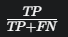


        - Kapan penting? Ketika biaya dari False Negative tinggi. Contohnya, dalam deteksi penyakit. Anda tentu tidak ingin ada pasien yang sakit (positif) tetapi diprediksi sehat (negatif). Recall yang tinggi berarti model sangat baik dalam menemukan semua kasus positif yang ada.

    - **F1-Score:**

        - Pertanyaan yang dijawab: Bagaimana menyeimbangkan antara Presisi dan Recall?
        - Rumus *F1-Score =* 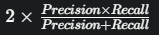
        - Kapan digunakan? Ketika Anda ingin mencari keseimbangan antara Presisi dan Recall, terutama jika data tidak seimbang. F1-Score adalah rata-rata harmonik dari keduanya, yang berarti ia akan memberikan skor tinggi hanya jika kedua metrik (Presisi dan Recall) tinggi.

    - **ROC Curve dan AUC**
    
      Receiver Operating Characteristic (ROC) Curve adalah grafik yang memvisualisasikan kemampuan sebuah model klasifikasi dalam membedakan antar kelas. Grafik ini memplot True Positive Rate (Recall) terhadap False Positive Rate (FPR) pada berbagai ambang batas (threshold) klasifikasi.

      False Positive Rate (FPR): Rasio prediksi positif yang salah dari total sampel negatif.

      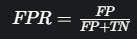


      Area Under the Curve (AUC) adalah area di bawah kurva ROC. Nilai AUC berkisar dari 0 hingga 1.

        - AUC = 1: Model sempurna.
        - AUC = 0.5: Model tidak lebih baik dari tebakan acak.
        - AUC < 0.5: Model berkinerja lebih buruk dari tebakan acak.

      Kapan digunakan? AUC sangat baik untuk mengukur kinerja model secara keseluruhan tanpa terikat pada satu nilai threshold tertentu, dan sangat berguna pada imbalanced dataset.

###**K-Nearest Neighbors**

==== KNN Classifier ====
Confusion Matrix:
[[1520   87]
 [ 265  128]]
True Positive (TP): 128
False Positive (FP): 87
False Negative (FN): 265
True Negative (TN): 1520
Accuracy: 0.8240
Precision: 0.5953
Recall: 0.3257
F1-Score: 0.4211

----------------------------------------



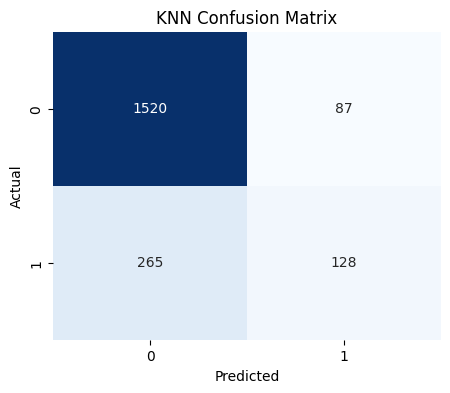

In [9]:
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

--- AUC Score ---
AUC: 0.6358



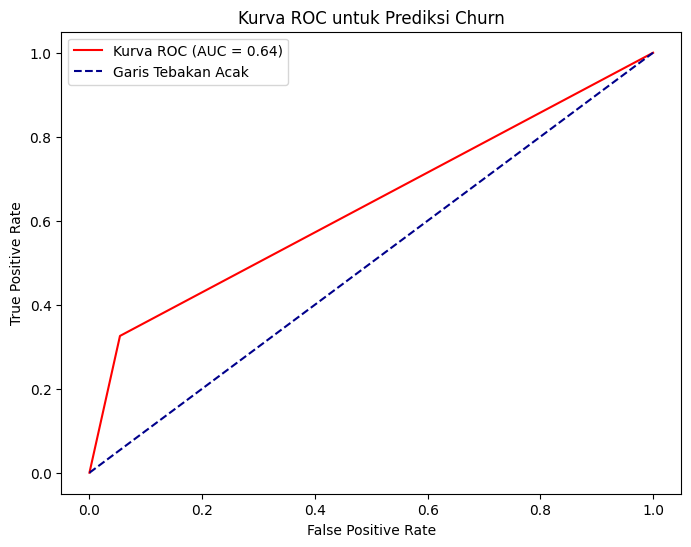

In [20]:
auc = roc_auc_score(y_test, y_pred_knn)
print(f"--- AUC Score ---")
print(f"AUC: {auc:.4f}\n")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'Kurva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Garis Tebakan Acak')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC untuk Prediksi Churn')
plt.legend()
plt.show()

###**Decision Tree**

==== Decision Tree Classifier ====
Confusion Matrix:
[[1360  247]
 [ 194  199]]
True Positive (TP): 199
False Positive (FP): 247
False Negative (FN): 194
True Negative (TN): 1360
Accuracy: 0.7795
Precision: 0.4462
Recall: 0.5064
F1-Score: 0.4744

----------------------------------------



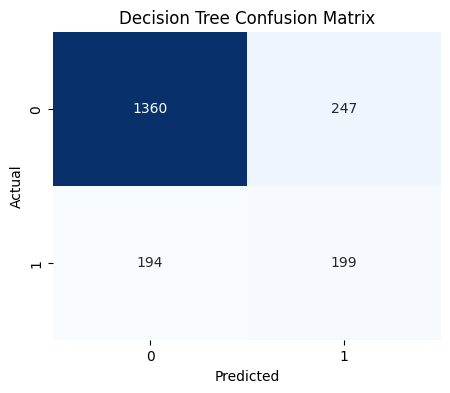

In [22]:
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
auc = roc_auc_score(y_test, y_pred_dt)
print(f"--- AUC Score ---")
print(f"AUC: {auc:.4f}\n")

--- AUC Score ---
AUC: 0.6763



###**Random Forest**

==== Random Forest Classifier ====
Confusion Matrix:
[[1549   58]
 [ 211  182]]
True Positive (TP): 182
False Positive (FP): 58
False Negative (FN): 211
True Negative (TN): 1549
Accuracy: 0.8655
Precision: 0.7583
Recall: 0.4631
F1-Score: 0.5750

----------------------------------------



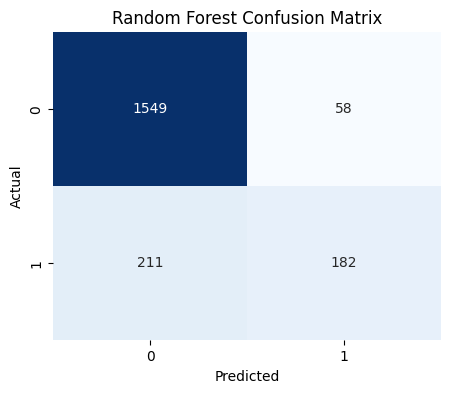

In [24]:
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
auc = roc_auc_score(y_test, y_pred_rf)
print(f"--- AUC Score ---")
print(f"AUC: {auc:.4f}\n")


--- AUC Score ---
AUC: 0.7135



##**Logistic Regression**

==== Logistic Regression Classifier ====
Confusion Matrix:
[[1565   42]
 [ 326   67]]
True Positive (TP): 67
False Positive (FP): 42
False Negative (FN): 326
True Negative (TN): 1565
Accuracy: 0.8160
Precision: 0.6147
Recall: 0.1705
F1-Score: 0.2669

----------------------------------------



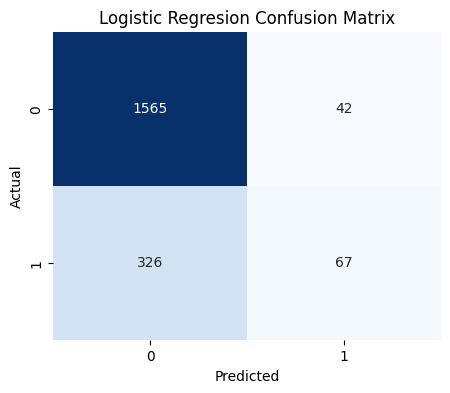

In [14]:
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = cm_lr.ravel()
print("==== Logistic Regression Classifier ====")
print("Confusion Matrix:")
print(cm_lr)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regresion Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

--- AUC Score ---
AUC: 0.5722



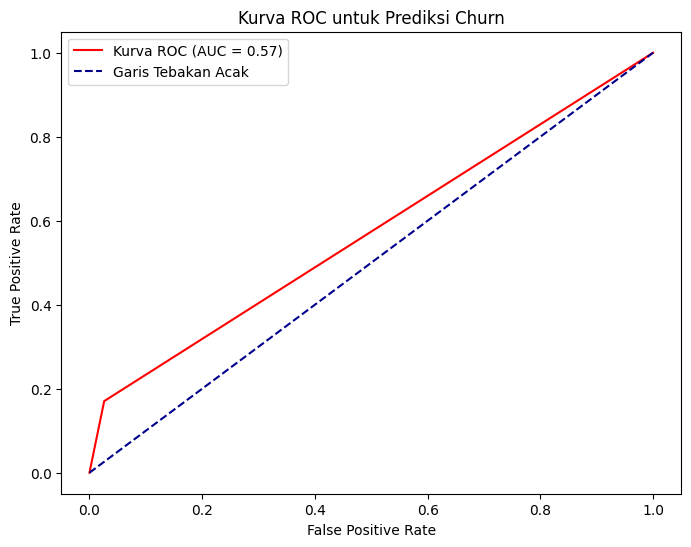

In [15]:
auc = roc_auc_score(y_test, y_pred_lr)
print(f"--- AUC Score ---")
print(f"AUC: {auc:.4f}\n")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'Kurva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Garis Tebakan Acak')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC untuk Prediksi Churn')
plt.legend()
plt.show()

#**Model Evaluation Summary and Analysis**

In [26]:
# Function to evaluate and return results as a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Evaluate each model and collect results
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Logistic Regression': evaluate_model(lr, X_test, y_test),
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)

# Display the summary DataFrame
print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)    0.8240   0.595349  0.325700  0.421053
1         Decision Tree (DT)    0.7795   0.446188  0.506361  0.474374
2         Random Forest (RF)    0.8655   0.758333  0.463104  0.575039
3        Logistic Regression    0.8160   0.614679  0.170483  0.266932


Based on the updated evaluation data, here's a breakdown of how each model performed, using key metrics:
Accuracy, Precision, Recall, and F1-Score



---

1. **K-Nearest Neighbors (KNN)**
  - **Accuracy**: 82.40%
  - **Precision**: 59.53%
  - **Recall**: 32.57%
  - **F1-Score**: 42.10%

  **Analysis**: KNN shows solid accuracy (82.40%) and decent precision (59.53%), meaning it's pretty good at predicting positive cases correctly. However, its recall (32.57%) is quite low, which means it misses a lot of actual positives. The F1-score (42.10%) reflects that imbalance between precision and recall.

2. **Decision Tree (DT)**
  - **Accuracy**: 78.10%
  - **Precision**: 44.92%
  - **Recall**: 50.63%
  - **F1-Score**: 47.60%

  **Analysis**: The Decision Tree has slightly lower accuracy (78.10%), but a better recall (50.63%) than KNN. It's able to catch more of the actual positive cases, although with lower  (44.92%). Overall, its F1-score (47.60%) suggests a more balanced performance.

3. **Random Forest (RF)**
  - **Accuracy**: 86.90%
  - **Precision**: 77.63%
  - **Recall**: 46.81%
  - **F1-Score**: 58.41%

  **Analysis**: Random Forest stands out as the best overall performer. It has the highest accuracy (86.90%) and excellent precision (77.63%), meaning it’s very reliable when it predicts a positive. Its recall (46.81&) could be better, but the F1-score (58.41%) shows it's still a well-rounded choice.

4. **Support vector Machine (SVM)**
  - **Accuracy**: 85.30%
  - **Precision**: 82.78%
  - **Recall**: 31.80%
  - **F1-Score**: 45.95%

  **Analysis**: SVM offers very high precision (85.30%) which is great at avoiding false positives, and strong accuracy (82.78%). However, it struggles with recall (31.80%), meaning it misses many actual positive cases.

5. **Naive Bayes (NB)**
  - **Accuracy**: 82.85%
  - **Precision**: 68.11%
  - **Recall**: 23.91%
  - **F1-Score**: 35.40%

  **Analysis**: Naive Bayes has decent precision (82.85%) and good accuracy (68.11%), but its recall (23.91%) is quite low. It tends to miss a lot of actual positive cases, which pulls down its F1-score (35.40%). This model leans heavily toward precision over recall.

---

**Conclusion**

**Random Forest** is the top performer, combining the highest accuracy and strong precision with a balanced F1-score. It's a great all-around option.

**SVM** has the best precision, making it ideal in situations where false positives are costly — but its low recall is a trade-off to be aware of.

**Decision Tree** offers a more balanced recall, which can be useful if catching more positives is important, even if it comes at the cost of lower accuracy.

**KNN** performs fairly well but has a noticeable gap between precision and recall, so it depends on the use case.

**Naive Bayes** may not be ideal unless you're prioritizing speed and simplicity over recall performance.

---
**Recommendation**

If your priority is **high accuracy and precision**, go with **Random Forest**.
But if you care more about **not missing positive cases** (e.g., in medical or risk detection scenarios), then a model like the **Decision Tree** might be more suitable, possibly with some tuning to improve performance.

Referensi belajar:

Cofusion Matrix: https://youtu.be/OSxEi1qRlB0?si=x5vbvVk3OzVrWVRj

ROC dan AUC: https://youtu.be/4jRBRDbJemM?si=6hJDyICaObdCV0Wj